## Visualization project on world population data Done By : Dagim Alemu & Yishak Abreham 

imporing necessary libraryies 

In [9]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sea

load the world population data csv

In [3]:
data = pd.read_csv('world_population_data.csv')

In [8]:
data.head()

,Country,Year,Population,Yearly Change,Net Change,Migrants (net),Median Age,Urban Population %,Density (P/Km²),Urban Pop%,Urban population,Country's Share of World Pop,World Population,Global Rank
0,India,2025,"1,463,865,525",0.89 %,"12,929,734","-495,753",28.8,1.94,492,37.1 %,"542,742,539",17.78 %,"8,231,613,070",1
1,India,2024,"1,450,935,791",0.89 %,"12,866,195","-630,830",28.4,1.96,488,36.6 %,"530,387,142",17.78 %,"8,161,972,572",1
2,India,2023,"1,438,069,596",0.89 %,"12,646,384","-979,179",28.1,1.98,484,36.0 %,"518,239,122",17.77 %,"8,091,734,930",1
3,India,2022,"1,425,423,212",0.79 %,"11,219,316","-1,353,478",27.7,1.99,479,35.5 %,"506,304,869",17.77 %,"8,021,407,192",1
4,India,2020,"1,402,617,695",0.98 %,"13,587,383","-73,806",27.0,2.05,472,34.4 %,"483,098,640",17.78 %,"7,887,001,292",2


Line graph showing the change of population over time for ethiopia only 

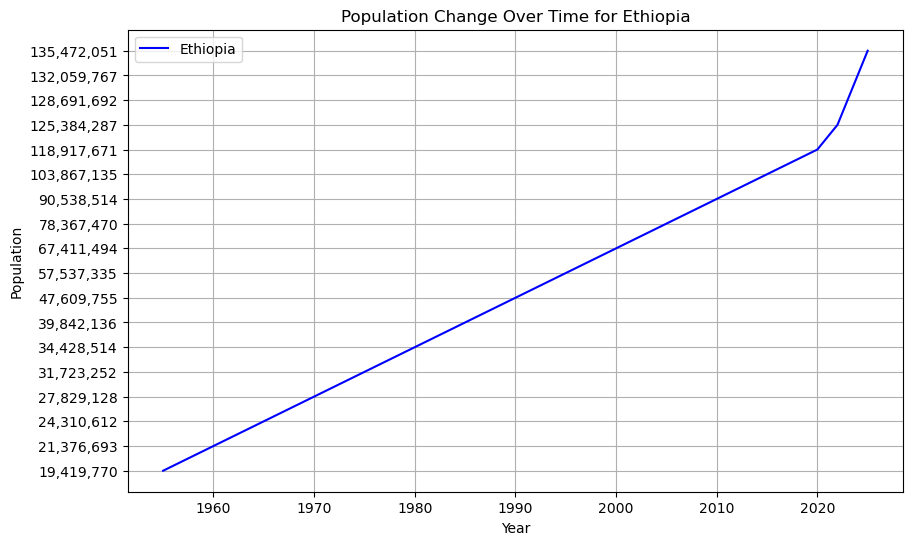

In [14]:

# creating variable for ethiopia only 
ethiopia_data = df_filtered[df_filtered['Country'] == 'Ethiopia']

plt.figure(figsize=(10, 6))
plt.plot(ethiopia_data['Year'], ethiopia_data['Population'], label='Ethiopia', color='blue')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Change Over Time for Ethiopia')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


line graph population change showing for east african countries as a whole 

C:\Users\HP Laptop 15\AppData\Local\Temp\ipykernel_8960\4206790614.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_east_africa['Population'] = df_east_africa['Population'].str.replace(',', '').astype(int)


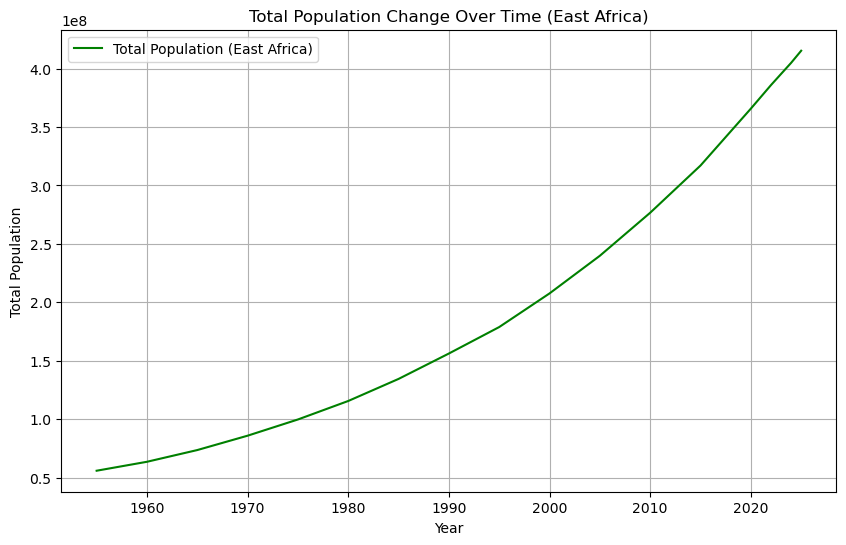

In [ ]:
# east african countries    
east_africa_countries = [
    'Ethiopia', 'Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'Somalia', 'Sudan'
]


df_east_africa = data[data['Country'].isin(east_africa_countries)]

df_east_africa['Population'] = df_east_africa['Population'].str.replace(',', '').astype(int)
east_africa_population = df_east_africa.groupby('Year')['Population'].sum().reset_index()

# plot over time for east african countries 
plt.figure(figsize=(10, 6))
plt.plot(east_africa_population['Year'], east_africa_population['Population'], label='Total Population (East Africa)', color='green')
plt.xlabel('Year')
plt.ylabel('Total Population')

plt.title('Total Population Change Over Time (East Africa)')

plt.legend()
plt.grid(True)

plt.show()

# Filter countries with low total population in all the years low_population_threshold < 500000

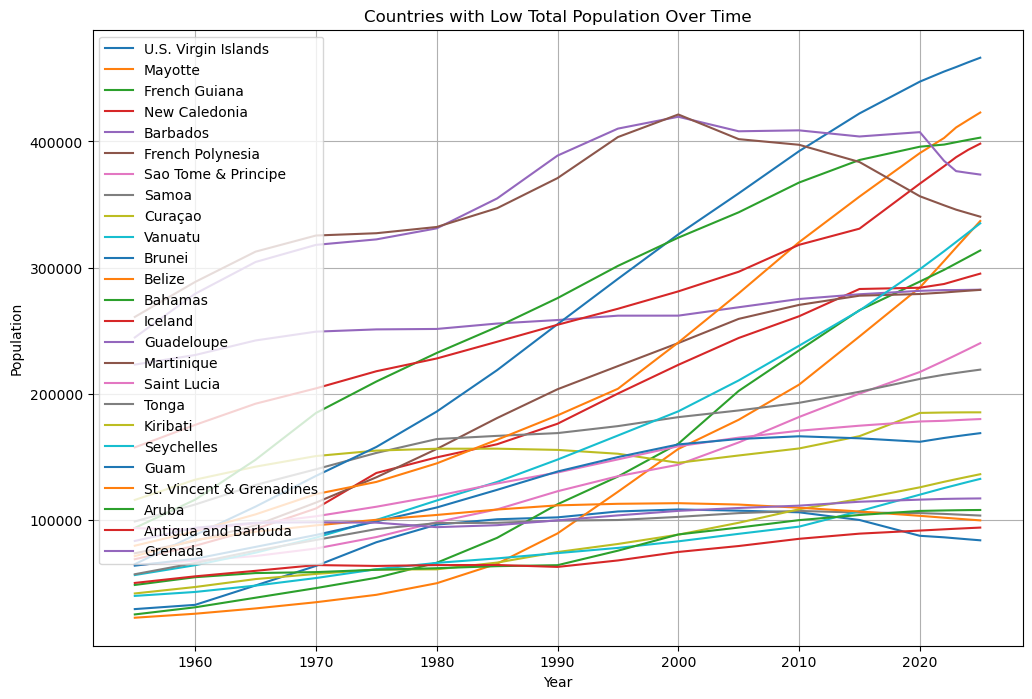

In [ ]:
# low population 
low_population_threshold = 500000  

df_filtered['Population'] = df_filtered['Population'].str.replace(',', '').astype(int)


low_population_countries = df_filtered.groupby('Country').filter(lambda x: x['Population'].max() < low_population_threshold)

# Plot the data
plt.figure(figsize=(12, 8))
for country in low_population_countries['Country'].unique():
    country_data = low_population_countries[low_population_countries['Country'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Countries with Low Total Population Over Time')
plt.legend()
plt.grid(True)
plt.show()

plotting countries with high population over time

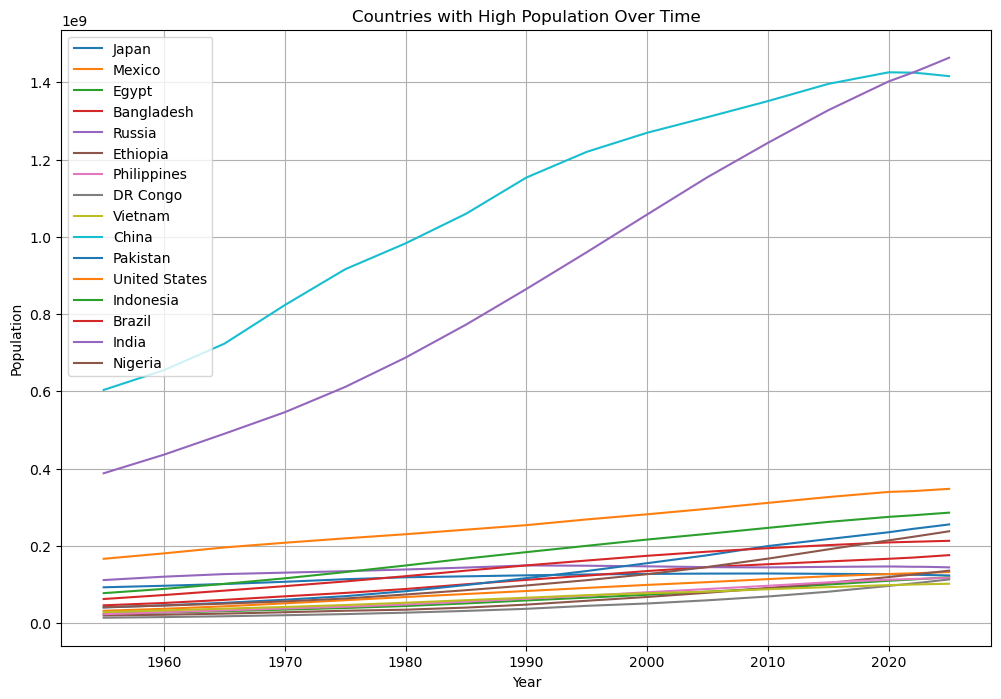

In [39]:
# setting the threshold for high population 
high_population_threshold = 100000000  

# filtering countries with high population bleow
high_population_countries = df_filtered.groupby('Country').filter(lambda x: x['Population'].max() > high_population_threshold)

# Plot the data
plt.figure(figsize=(12, 8))
for country in high_population_countries['Country'].unique():
    country_data = high_population_countries[high_population_countries['Country'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Countries with High Population Over Time')
plt.legend()
plt.grid(True)
plt.show()

Stacked plot for african countries change over time

C:\Users\HP Laptop 15\AppData\Local\Temp\ipykernel_8960\4254919991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_data['Population'] = africa_data['Population'].str.replace(',', '').astype(int)


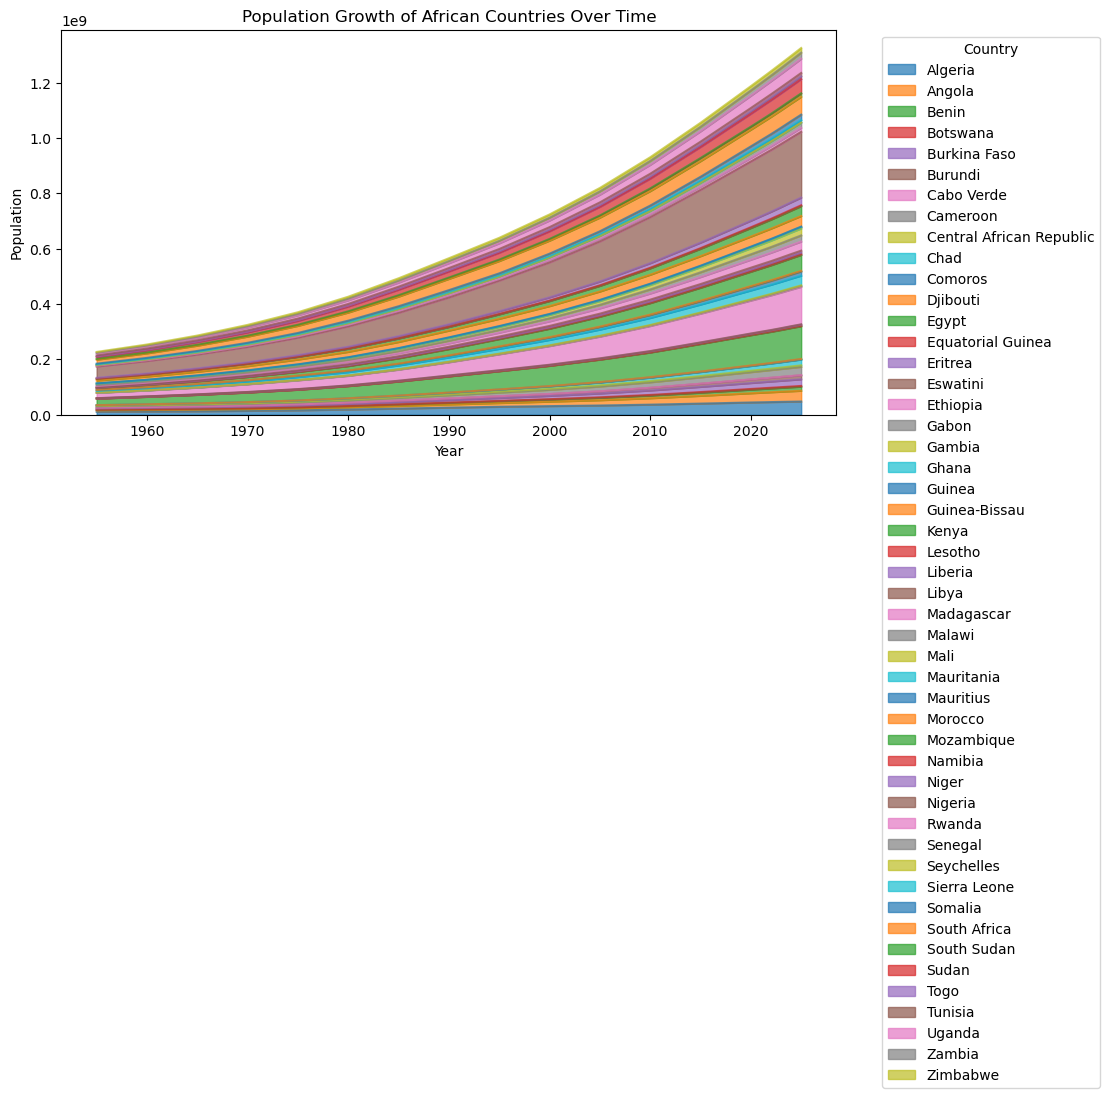

In [ ]:
# numeric values for african pouplation 
africa_data['Population'] = africa_data['Population'].str.replace(',', '').astype(int)

df_pivot = africa_data.pivot(index='Year', columns='Country', values='Population')

# stacked area plott
df_pivot.plot(kind='area', stacked=True, figsize=(10, 5), alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth of African Countries Over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


bar graph comparing China, Ethiopian and India

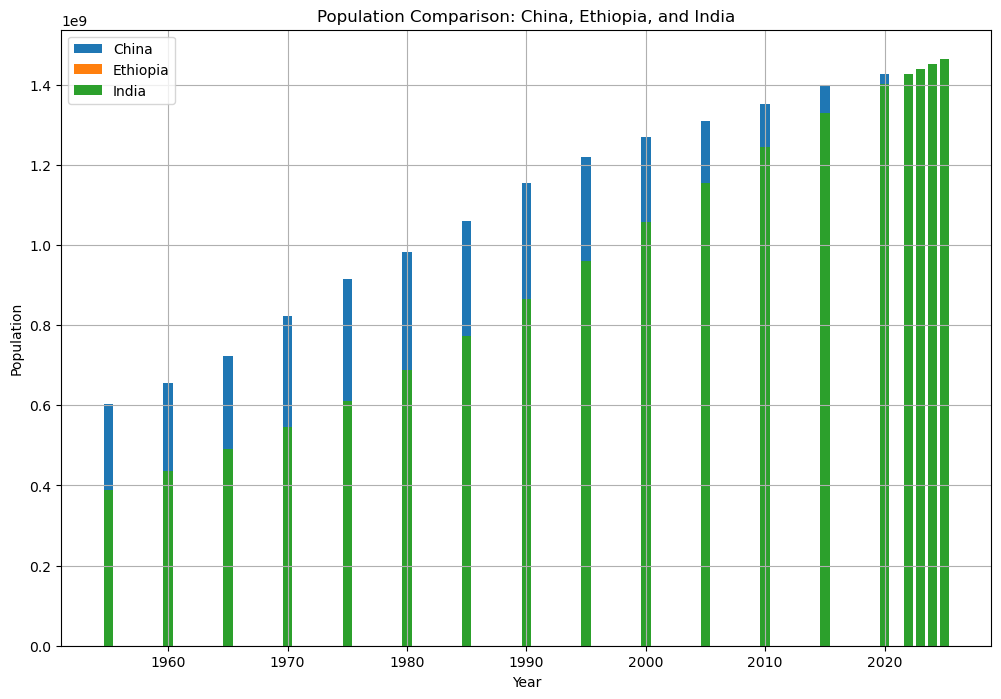

In [ ]:
# China, Ethiopia, and India
countries_to_compare = ['China', 'Ethiopia', 'India']
comparison_data = df_filtered[df_filtered['Country'].isin(countries_to_compare)]

# Plot the data
plt.figure(figsize=(12, 8))
for country in countries_to_compare:
    country_data = comparison_data[comparison_data['Country'] == country]
    plt.bar(country_data['Year'], country_data['Population'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Comparison: China, Ethiopia, and India')
plt.legend()
plt.grid(True)
plt.show()

Pie chart showing the share of china, Ethiopia, India and usa from the world population 

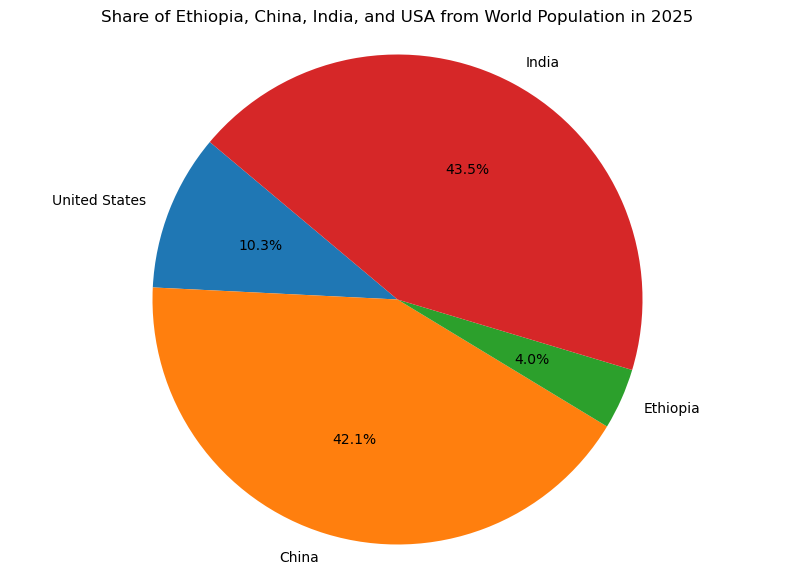

In [ ]:
# selected countries 
countries_to_plot = ['Ethiopia', 'China', 'India', 'United States']
pie_data = df_filtered[df_filtered['Country'].isin(countries_to_plot) & (df_filtered['Year'] == 2025)]

# plott
plt.figure(figsize=(10, 7))
plt.pie(pie_data['Population'], labels=pie_data['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Share of Ethiopia, China, India, and USA from World Population in 2025')
plt.axis('equal')  

# Show plot
plt.show()